# Pymaceuticals Inc.
---

### Analysis

Summary:
1. We can see with the help of Pie chart that the dataset has almost equal number of both gender mice.

2.By analyzing the bar chart between "Timepoints" and "Drug Regimen" we may say that for every drug there were very less difference in the number of observed timepoints.

3.As we can see from the summary statistics, the mean and median tumor volume for the mice are much less for the drug "Capomulin".The standard variation for tumor volume of the mice treated with Capomulin, is also smaller which supports the fact that this drugs performed much better for the treatment.
 
4.We may also conclude that more weight is directly related to more tumor volume by anlyzing at the scatterplot and linear regression model.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Studying data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single DataFrame
science_study_df = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')

# Displaying the data table for preview
science_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(science_study_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ids_duplicated = science_study_df[science_study_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
mouse_ids_duplicated

array(['g989'], dtype=object)

In [4]:
#Optional: Get all the data for the duplicate mouse ID. 
mouse_data_duplicated = science_study_df[science_study_df["Mouse ID"] == 'g989']
mouse_data_duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_science_study_df = science_study_df[science_study_df["Mouse ID"].isin(mouse_ids_duplicated)== False]
clean_science_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_science_study_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg_method_df = clean_science_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_agg_method_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

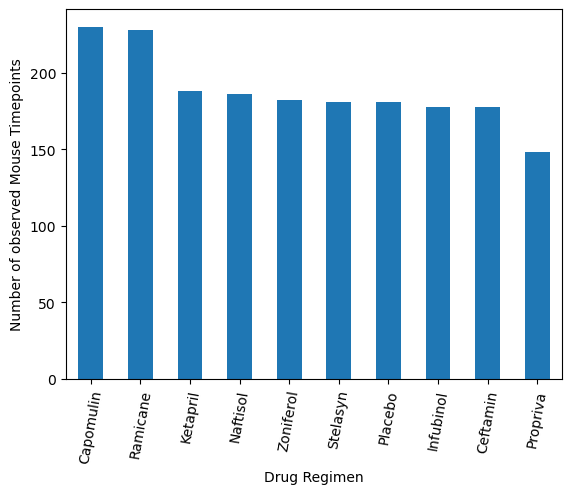

In [8]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_science_study_df["Drug Regimen"].value_counts()
drug_counts.plot(kind = "bar", alpha =1)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of observed Mouse Timepoints")
plt.xticks(rotation = 80)
plt.show()


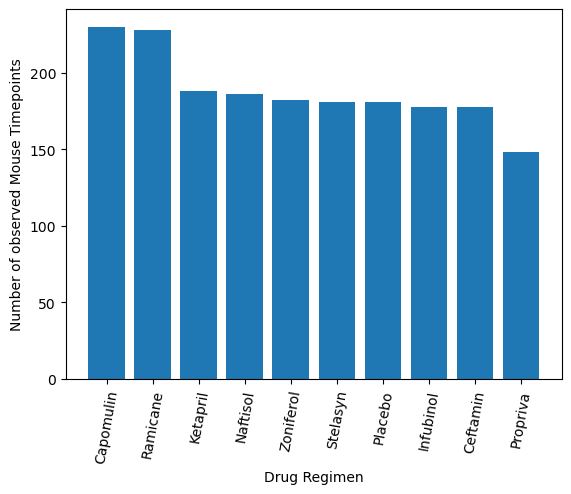

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_science_study_df["Drug Regimen"].value_counts()
plt.bar(drug_counts.index.values,drug_counts.values,alpha=1)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of observed Mouse Timepoints")
plt.xticks(rotation=80)
plt.show()


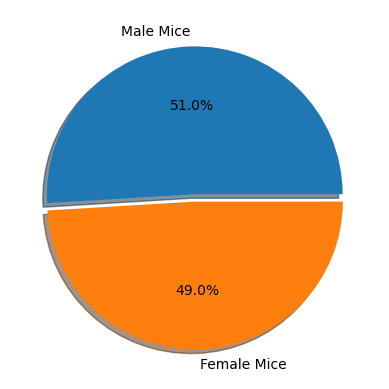

In [10]:
#Generating a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = ["Male Mice","Female Mice"]
gender_counts = clean_science_study_df.Sex.value_counts()
explode = (0,0.05)
plt.pie(gender_counts, explode = explode, labels = mice_gender, shadow = True, autopct ="%1.1f%%")
plt.show()

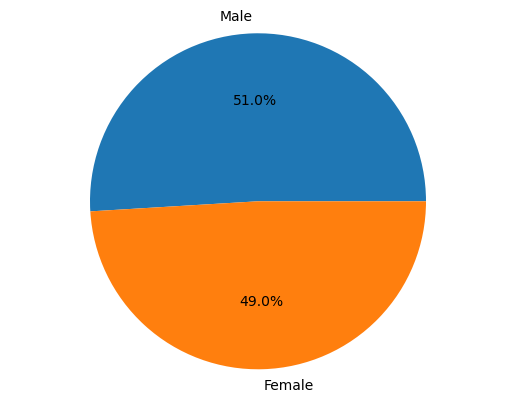

In [11]:
# Generating a pie plot showing the distribution of female versus male mice using Pyplot
gender_counts = clean_science_study_df.Sex.value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index.values, autopct='%1.1f%%')
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_tumor_tp_value = clean_science_study_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor_tp_value = max_tumor_tp_value.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_df = max_tumor_tp_value.merge(clean_science_study_df,on=["Mouse ID","Timepoint"], how="left")


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data_df.loc[merged_data_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    
    outliers=final_tumor_volume.loc[(final_tumor_volume<lower_bound)|(final_tumor_volume>upper_bound)]
    print(f"{drug} a potential outliers {outliers}")    

Capomulin a potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane a potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol a potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin a potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


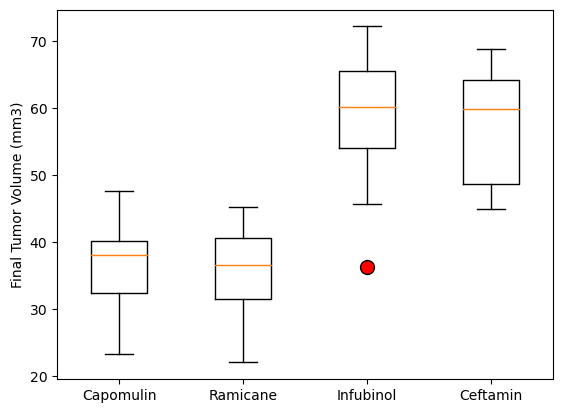

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_outlier = dict(markerfacecolor='red', markersize=10)
plt.boxplot(tumor_volume_list, labels=treatment_list, flierprops=orange_outlier)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

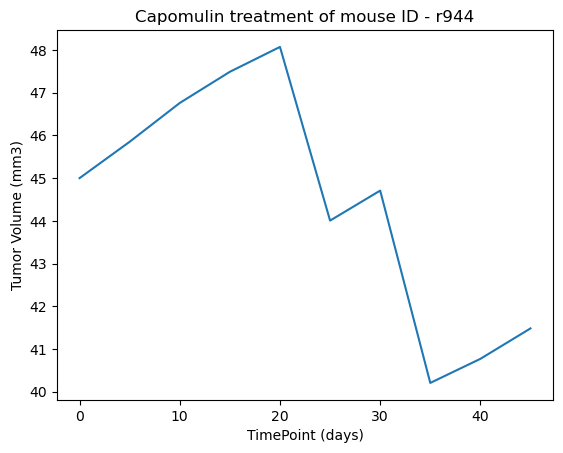

In [15]:
# Generating a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_science_study_df[clean_science_study_df["Drug Regimen"]=="Capomulin"]
#capomulin_table
single_mouse_data = capomulin_table[capomulin_table["Mouse ID"]=="l509"]
plt.plot(single_mouse_data["Timepoint"],single_mouse_data["Tumor Volume (mm3)"])
plt.xlabel("TimePoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse ID - r944")
plt.show()


/var/folders/lc/n_vmfzws5pz68jfpmg0k6t300000gp/T/ipykernel_5217/2773022383.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg=capomulin_df.groupby(["Mouse ID"]).mean()


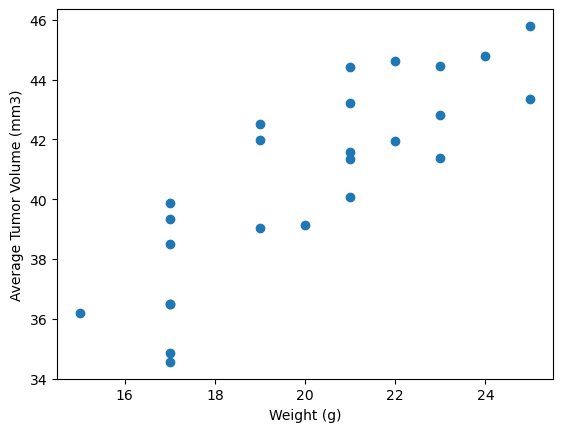

In [16]:
# Generating a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df=clean_science_study_df[clean_science_study_df["Drug Regimen"]=="Capomulin"]
capomulin_df
capomulin_avg=capomulin_df.groupby(["Mouse ID"]).mean()
capomulin_avg
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()                      

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


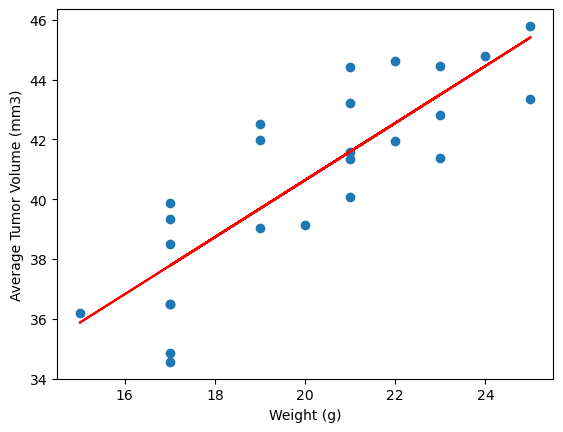

In [17]:
#Calculating the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coeff=st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coeff[0],2)}")

#Linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
model = st.linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
slope = model[0]
b=model[1]

y_values = capomulin_avg["Weight (g)"] * slope + b
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], y_values, color ='r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



